In [1]:
#Import Libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.graphics.tsaplots as tsa_plots
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

from pandas.plotting import register_matplotlib_converters
from matplotlib.dates import DateFormatter
from matplotlib import dates as mpld

register_matplotlib_converters()

In [2]:
df=pd.read_csv('crude-oil-price.csv')
df.head()

,date,price,percentChange,change
0,1983-03-30T00:00:00,29.27,NaN,NaN
1,1983-04-04T00:00:00,30.63,4.646396,1.36
2,1983-05-02T00:00:00,30.25,-1.240614,-0.38
3,1983-06-01T00:00:00,31.38,3.735537,1.13
4,1983-07-01T00:00:00,32.00,1.975781,0.62


In [4]:
df.columns

Index(['date', 'price', 'percentChange', 'change'], dtype='object')

In [5]:
df.shape

(469, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469 entries, 0 to 468
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           469 non-null    object 
 1   price          469 non-null    float64
 2   percentChange  468 non-null    float64
 3   change         468 non-null    float64
dtypes: float64(3), object(1)
memory usage: 14.8+ KB


In [7]:
#check data type
df.dtypes

date              object
price            float64
percentChange    float64
change           float64
dtype: object

In [8]:
df[df.duplicated()]

,date,price,percentChange,change


In [9]:
df.isnull().sum()

date             0
price            0
percentChange    1
change           1
dtype: int64

In [10]:
# missing value across the columns 
df.isnull().sum()

# missing value along the row
print(df.isnull().sum(axis=1))
print(df.isnull().sum(axis=0))


0      2
1      0
2      0
3      0
4      0
      ..
464    0
465    0
466    0
467    0
468    0
Length: 469, dtype: int64
date             0
price            0
percentChange    1
change           1
dtype: int64


In [11]:
df1=df.dropna(axis=0)
df1.shape
# missing value along the row and column after removal
print(df1.isnull().sum(axis=1))
print(df1.isnull().sum(axis=0))

1      0
2      0
3      0
4      0
5      0
      ..
464    0
465    0
466    0
467    0
468    0
Length: 468, dtype: int64
date             0
price            0
percentChange    0
change           0
dtype: int64


In [12]:
df1.describe()

,price,percentChange,change
count,468.000000,468.000000,468.000000
mean,44.103269,0.838667,0.171068
std,28.398837,10.685748,4.954575
min,10.420000,-54.244861,-32.830000
25%,20.267500,-5.040127,-1.632500
50%,30.835000,0.956201,0.280000
75%,63.662500,6.511568,2.317500
max,140.000000,88.375796,16.650000


In [24]:
df1

,date,price,percentChange,change,Months
1,1983-04-04,30.63,4.646396,1.36,Apr
2,1983-05-02,30.25,-1.240614,-0.38,May
3,1983-06-01,31.38,3.735537,1.13,Jun
4,1983-07-01,32.00,1.975781,0.62,Jul
5,1983-08-01,31.59,-1.281250,-0.41,Aug
...,...,...,...,...,...
464,2021-11-01,65.85,-19.479090,-15.93,Nov
465,2021-12-01,74.88,13.712984,9.03,Dec
466,2022-01-03,86.49,15.504808,11.61,Jan
467,2022-02-01,95.72,10.671754,9.23,Feb


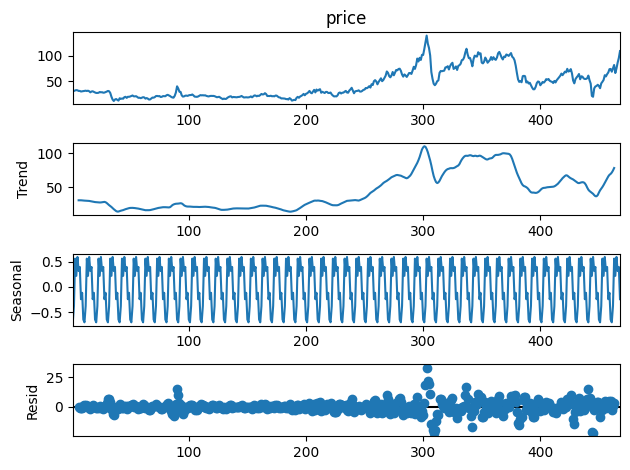

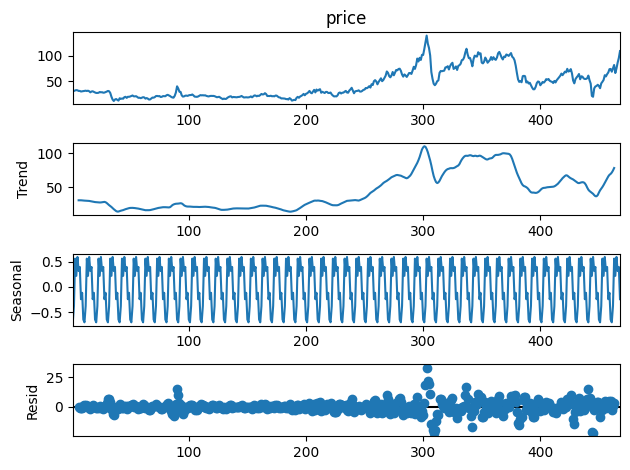

In [25]:
import statsmodels.api as smf
seasonal_ts_add=smf.tsa.seasonal_decompose(df1["price"],period=10)
seasonal_ts_add.plot()

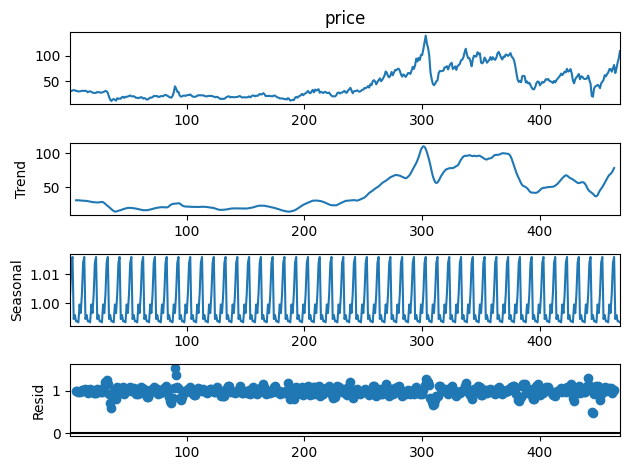

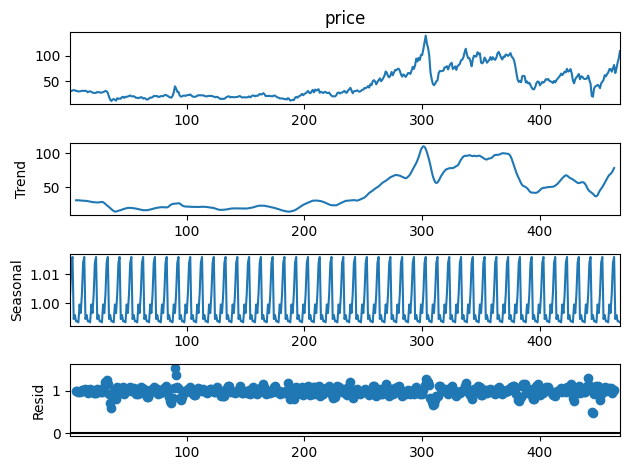

In [27]:
### Seasonality plot using Multiplicative model

seasonal_muli=smf.tsa.seasonal_decompose(df1["price"],period=10, model='multiplicative')
seasonal_muli.plot()

**Visualization**

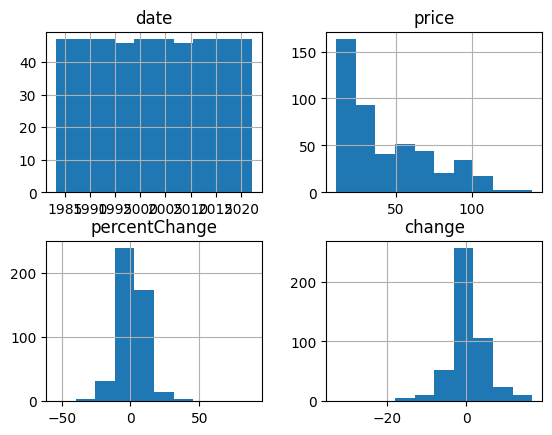

In [29]:
df1.hist()
pyplot.show()


<Axes: >

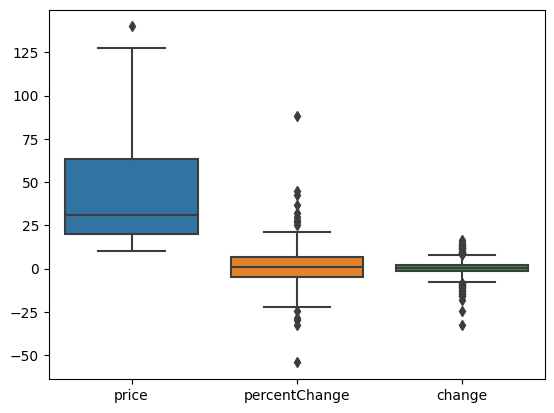

In [31]:
#Box plot for Outlier detection
sns.boxplot(data=df1)

Text(0.5, 1.0, 'Oil price Chart')

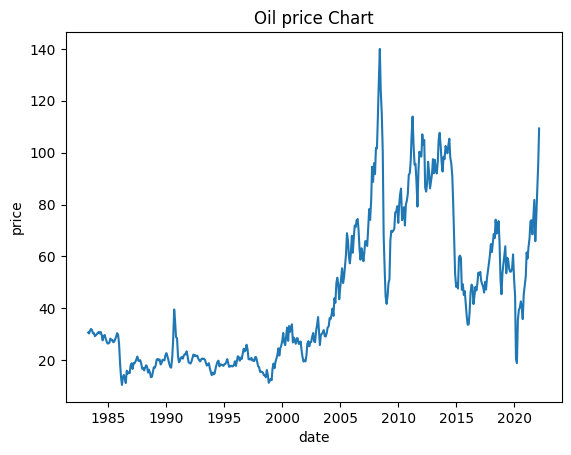

In [32]:
#Time Vs price line plot
sns.lineplot(data=df1,x='date',y='price')
plt.title('Oil price Chart')

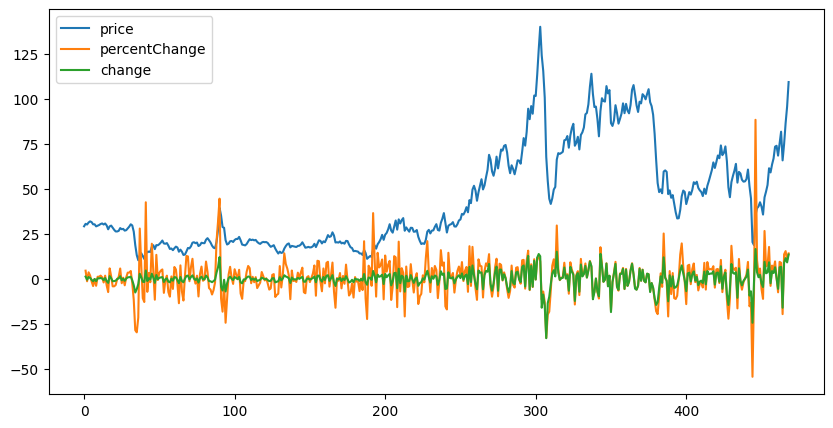

In [35]:
df.plot(figsize=(10,5))
plt.show()


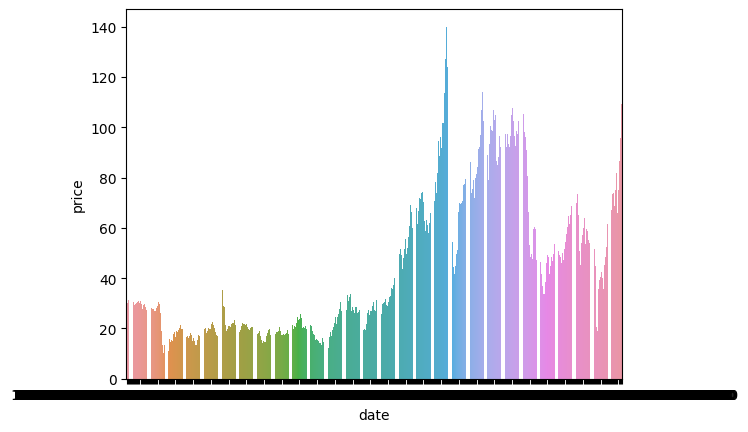

In [36]:
sns.barplot(x='date',y='price',data=df1)
plt.show()

In [37]:
df1['date'] = pd.to_datetime(df1['date'])
df1['Months'] = df1['date'].dt.strftime('%b')
df1.head()

<ipython-input-37-795f4c30b1d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['date'] = pd.to_datetime(df1['date'])
<ipython-input-37-795f4c30b1d1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Months'] = df1['date'].dt.strftime('%b')


,date,price,percentChange,change,Months
1,1983-04-04,30.63,4.646396,1.36,Apr
2,1983-05-02,30.25,-1.240614,-0.38,May
3,1983-06-01,31.38,3.735537,1.13,Jun
4,1983-07-01,32.00,1.975781,0.62,Jul
5,1983-08-01,31.59,-1.281250,-0.41,Aug


In [38]:
## Let's drop column
df2=df1.drop(['percentChange','change'], axis=1)
df2

,date,price,Months
1,1983-04-04,30.63,Apr
2,1983-05-02,30.25,May
3,1983-06-01,31.38,Jun
4,1983-07-01,32.00,Jul
5,1983-08-01,31.59,Aug
...,...,...,...
464,2021-11-01,65.85,Nov
465,2021-12-01,74.88,Dec
466,2022-01-03,86.49,Jan
467,2022-02-01,95.72,Feb


In [39]:
## Let's test for whether the data is stationary or not
## 1. Augmented Dickey Fuller (ADF) Test
# Perform the ADF test
from statsmodels.tsa.stattools import adfuller
result = adfuller(df2['price'])

# Extract the p-value
p_value = result[1]
print(p_value)
# Check if the data is stationary
if p_value < 0.05:
    print("The time series data is stationary.")
else:
    print("The time series data is non-stationary.") 

0.38908743511571087
The time series data is non-stationary.


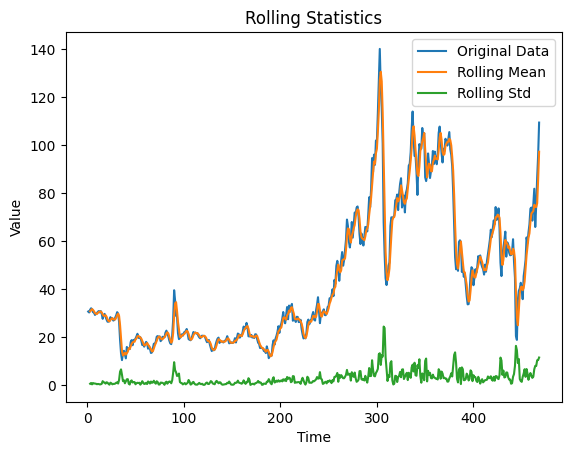

In [40]:
## 2. Using Rolling Stastitics
# Calculate the rolling mean with a window of your choice
rolling_mean = df2['price'].rolling(window=3).mean()

# Calculate the rolling standard deviation with a window of your choice
rolling_std = df2['price'].rolling(window=3).std()

# Plot the original time series data
plt.plot(df2['price'], label='Original Data')

# Plot the rolling mean
plt.plot(rolling_mean, label='Rolling Mean')

# Plot the rolling standard deviation
plt.plot(rolling_std, label='Rolling Std')

# Add labels and a legend to the plot
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Rolling Statistics')
plt.legend()

# Display the plot
plt.show()

In [41]:
## The time series data is no0n stationary. 

In [42]:
### Before modelling, we need to remove seasonality
ts_log = np.log(df2['price'])
ts_log_diff = ts_log - ts_log.shift()
ts_log_diff.dropna(inplace=True)
ts_log_diff

2     -0.012484
3      0.036675
4      0.019565
5     -0.012895
6     -0.039715
         ...   
464   -0.216653
465    0.128507
466    0.144142
467    0.101398
468    0.132944
Name: price, Length: 467, dtype: float64

In [44]:
## After transformation let's check series is stationary or not
result1 = adfuller(ts_log_diff)

# Extract the p-value
p_value1 = result1[1]
print(p_value1)
# Check if the data is stationary
if p_value1 < 0.05:
    print("The time series data is stationary.")
else:
    print("The time series data is non-stationary.") 

4.582898625555665e-22
The time series data is stationary.


In [45]:
#from statsmodels.tsa.arima.model.ARIMA
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, pacf
from sklearn.metrics import mean_squared_error

In [46]:
## Model Building
## 1. ARIMA Model
lag_acf = acf(ts_log_diff, nlags=10)
lag_pacf = pacf(ts_log_diff, nlags=10, method='ols')

Text(0.5, 1.0, 'Autocorrelation Function')

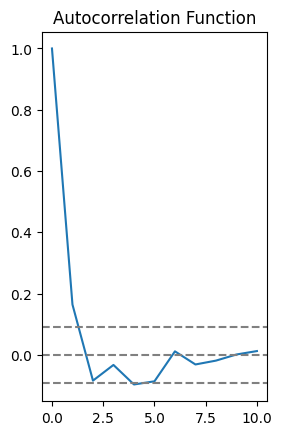

In [47]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

In [48]:
## Predicting last value data
X = ts_log_diff#df2['price'].values
size = len(X) - 1
train, test = X[0:size], X[size:]
model = sm.tsa.arima.ARIMA(train, order=(2,1,2))
model_fit = model.fit()
forecast = model_fit.get_forecast(steps=2)
predicted_values = forecast.summary_frame()['mean']
stderr = forecast.summary_frame()['mean_se']
conf = forecast.summary_frame(alpha=0.05)
print(size)
stderr
#print('Expected: %.3f' % test[0])
#print('Forecast: %.3f' %  forecast.predicted_mean[0])
#print('Standard Error: %.3f' % stderr)
#print('95%% Confidence Interval: %.3f to %.3f' % (conf[0][0], conf[0][1]))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integ

466


466    0.103898
467    0.105741
Name: mean_se, dtype: float64

In [49]:
### ARIMA model on 80% training data and 20% testing data
# Determine the index to split the data for training
split_index = int(len(ts_log_diff.values) * 0.8)  # 80% for training, 20% for testing
data= df2['price']
# Split the data into training and testing sets
train_data_80 = data[:split_index]
test_data_20 = data[split_index:]

# Fit the ARIMA model on the training data
model_2 = sm.tsa.arima.ARIMA(train_data_80, order=(2, 1, 2))  # Example order, you can adjust it as needed
model_fit2 = model_2.fit()

# Predict on the testing data
predictions = model_fit2.predict(start=len(train_data_80), end=len(data)-1)

# Print the predicted values
print(predictions)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

373    99.319024
374    99.185243
375    99.145520
376    99.133209
377    99.129495
         ...    
463    99.127858
464    99.127858
465    99.127858
466    99.127858
467    99.127858
Name: predicted_mean, Length: 95, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [50]:
### Let's find standard error for above predicted data
# Calculate the residuals
residuals = test_data_20 - predictions

# Calculate the standard error
standard_error = np.std(residuals)

# Print the standard error
print("Standard Error:", standard_error)
# Calculate RMSE
mse = mean_squared_error(test_data_20, predictions)
rmse_ARIMA = np.sqrt(mse)

# Print RMSE
print("RMSE of ARIMA model:", rmse_ARIMA)

Standard Error: 16.295782500917433
RMSE of ARIMA model: 44.88152116245357


In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
prices=df2['price'].values.reshape(-1, 1)
scaler = StandardScaler()
scaler.fit(prices)
prices_stand = scaler.transform(prices)
prices_stand

array([[-0.47493798],
       [-0.48833313],
       [-0.44850019],
       [-0.42664495],
       [-0.44109761],
       [-0.48445559],
       [-0.48410308],
       [-0.52428853],
       [-0.51124588],
       [-0.49785073],
       [-0.47775801],
       [-0.46718289],
       [-0.48798062],
       [-0.4678879 ],
       [-0.50595832],
       [-0.58174666],
       [-0.52428853],
       [-0.50913086],
       [-0.55143133],
       [-0.59196927],
       [-0.62369463],
       [-0.62369463],
       [-0.6124145 ],
       [-0.55742389],
       [-0.58068915],
       [-0.57328657],
       [-0.60747945],
       [-0.59866685],
       [-0.56482647],
       [-0.52957608],
       [-0.48375058],
       [-0.50595832],
       [-0.62757217],
       [-0.89089258],
       [-1.08723725],
       [-1.18734836],
       [-1.08441722],
       [-1.05057685],
       [-1.10415744],
       [-1.16161558],
       [-0.99417622],
       [-1.03400917],
       [-1.01638397],
       [-1.02590158],
       [-0.92226543],
       [-0

In [53]:
df_std=df2.copy()
df_std['std_prices']= prices_stand
#df2=df2.drop('std_prices', axis=1)
df2

,date,price,Months
1,1983-04-04,30.63,Apr
2,1983-05-02,30.25,May
3,1983-06-01,31.38,Jun
4,1983-07-01,32.00,Jul
5,1983-08-01,31.59,Aug
...,...,...,...
464,2021-11-01,65.85,Nov
465,2021-12-01,74.88,Dec
466,2022-01-03,86.49,Jan
467,2022-02-01,95.72,Feb


In [54]:
### Let's try another approach
month_dummies = pd.DataFrame(pd.get_dummies(df2['Months']))
df3_oil = pd.concat([df2,month_dummies],axis = 1)
df3_oil.head()

,date,price,Months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
1,1983-04-04,30.63,Apr,1,0,0,0,0,0,0,0,0,0,0,0
2,1983-05-02,30.25,May,0,0,0,0,0,0,0,0,1,0,0,0
3,1983-06-01,31.38,Jun,0,0,0,0,0,0,1,0,0,0,0,0
4,1983-07-01,32.00,Jul,0,0,0,0,0,1,0,0,0,0,0,0
5,1983-08-01,31.59,Aug,0,1,0,0,0,0,0,0,0,0,0,0


In [57]:
df3_oil["t"] = np.arange(1,468)
df3_oil["t_squared"] = df3_oil["t"]*df3_oil["t"]  
df3_oil["log_prices"] = np.log(df3_oil["price"])   
df3_oil.columns 
df3_oil.head()

,date,price,Months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,log_prices
1,1983-04-04,30.63,Apr,1,0,0,0,0,0,0,0,0,0,0,0,1,1,3.421980
2,1983-05-02,30.25,May,0,0,0,0,0,0,0,0,1,0,0,0,2,4,3.409496
3,1983-06-01,31.38,Jun,0,0,0,0,0,0,1,0,0,0,0,0,3,9,3.446171
4,1983-07-01,32.00,Jul,0,0,0,0,0,1,0,0,0,0,0,0,4,16,3.465736
5,1983-08-01,31.59,Aug,0,1,0,0,0,0,0,0,0,0,0,0,5,25,3.452841


In [58]:
df3_oil.shape

(468, 18)

In [59]:
### Splitting Data
Train_data2 = df3_oil.head(374)
Test_data2 = df3_oil.tail(94)

In [60]:
import statsmodels.formula.api as smf 

linear_model = smf.ols('price~t',data=Train_data2).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test_data2['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test_data2['price'])-np.array(pred_linear))**2))
print("The RMSE of linear Model",rmse_linear)

The RMSE of linear Model 38.83811796816689


In [61]:
#Exponential

Exp = smf.ols('log_prices~t',data=Train_data2).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test_data2['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test_data2['price'])-np.array(np.exp(pred_Exp)))**2))
print("The RMSE of Exponential Model",rmse_Exp)

The RMSE of Exponential Model 48.25784913477552


In [62]:
#Quadratic 

Quad = smf.ols('price~t+t_squared',data=Train_data2).fit()
pred_Quad = pd.Series(Quad.predict(Test_data2[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test_data2['price'])-np.array(pred_Quad))**2))
print("The RMSE of Quadratic Model",rmse_Quad)

The RMSE of Quadratic Model 99.29265502373028


In [63]:
#Additive seasonality 

add_sea = smf.ols('price~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train_data2).fit()
pred_add_sea = pd.Series(add_sea.predict(Test_data2[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test_data2['price'])-np.array(pred_add_sea))**2))
print("The RMSE of Quadratic Model",rmse_add_sea)

The RMSE of Quadratic Model 23.231969651634234


In [64]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('price~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train_data2).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test_data2[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test_data2['price'])-np.array(pred_add_sea_quad))**2))
print("The RMSE of Quadratic Model",rmse_add_sea_quad)

The RMSE of Quadratic Model 99.27356955303182


In [65]:
##Multiplicative Seasonality

Mul_sea = smf.ols('log_prices~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train_data2).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test_data2))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test_data2['price'])-np.array(np.exp(pred_Mult_sea)))**2))
print("The RMSE of Quadratic Model",rmse_Mult_sea)

The RMSE of Quadratic Model 29.68893415513967


In [66]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('log_prices~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train_data2).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test_data2))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test_data2['price'])-np.array(np.exp(pred_Mult_add_sea)))**2))
print("The RMSE of Quadratic Model",rmse_Mult_add_sea)

The RMSE of Quadratic Model 48.32835550304468


In [67]:
#pip install --upgrade TensorFlow

In [68]:
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [71]:
## LSTM algorithm
# Split data into train and test sets
# Normalize the data
prices = df2['price'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(prices)
scaled_prices

array([[0.15596543],
       [0.15303288],
       [0.16175336],
       [0.16653805],
       [0.16337398],
       [0.15388177],
       [0.15395894],
       [0.14516129],
       [0.14801667],
       [0.15094922],
       [0.15534805],
       [0.15766322],
       [0.15311005],
       [0.15750887],
       [0.14917426],
       [0.13258219],
       [0.14516129],
       [0.1484797 ],
       [0.13921902],
       [0.13034419],
       [0.12339867],
       [0.12339867],
       [0.12586819],
       [0.13790708],
       [0.13281371],
       [0.13443433],
       [0.1269486 ],
       [0.12887791],
       [0.13628646],
       [0.1440037 ],
       [0.15403612],
       [0.14917426],
       [0.12254978],
       [0.06490199],
       [0.02191696],
       [0.        ],
       [0.02253434],
       [0.02994289],
       [0.01821269],
       [0.00563359],
       [0.04229048],
       [0.03357   ],
       [0.03742862],
       [0.03534496],
       [0.05803365],
       [0.06428461],
       [0.04769255],
       [0.064

In [82]:
# Split the data into training and testing sets
train_size = int(len(scaled_prices) * 0.8)
train_data = scaled_prices[:train_size]
test_data = scaled_prices[train_size:]

# Create sequences for LSTM training
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

sequence_length = 10
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

# Define and train the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(sequence_length, 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Make predictions on the test data
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

# Calculate evaluation metrics
mse_lstm = np.mean((predicted_prices - scaler.inverse_transform(y_test))**2)
rmse_lstm= np.sqrt(mse_lstm)
mae_lstm = np.mean(np.abs(predicted_prices - scaler.inverse_transform(y_test)))

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse_lstm)
print("Root Mean Squared Error (RMSE):", rmse_lstm)
print("Mean Absolute Error (MAE):", mae_lstm)

Epoch 1/50
12/12 [==============================] - 13s 15ms/step - loss: 0.0363
Epoch 2/50
12/12 [==============================] - 0s 14ms/step - loss: 0.0101
Epoch 3/50
12/12 [==============================] - 0s 15ms/step - loss: 0.0067
Epoch 4/50
12/12 [==============================] - 0s 14ms/step - loss: 0.0065
Epoch 5/50
12/12 [==============================] - 0s 15ms/step - loss: 0.0064
Epoch 6/50
12/12 [==============================] - 0s 14ms/step - loss: 0.0063
Epoch 7/50
12/12 [==============================] - 0s 16ms/step - loss: 0.0059
Epoch 8/50
12/12 [==============================] - 0s 16ms/step - loss: 0.0057
Epoch 9/50
12/12 [==============================] - 0s 14ms/step - loss: 0.0070
Epoch 10/50
12/12 [==============================] - 0s 14ms/step - loss: 0.0065
Epoch 11/50
12/12 [==============================] - 0s 14ms/step - loss: 0.0064
Epoch 12/50
12/12 [==============================] - 0s 17ms/step - loss: 0.0054
Epoch 13/50
12/12 [=================

In [73]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [74]:
df2

,date,price,Months
1,1983-04-04,30.63,Apr
2,1983-05-02,30.25,May
3,1983-06-01,31.38,Jun
4,1983-07-01,32.00,Jul
5,1983-08-01,31.59,Aug
...,...,...,...
464,2021-11-01,65.85,Nov
465,2021-12-01,74.88,Dec
466,2022-01-03,86.49,Jan
467,2022-02-01,95.72,Feb


In [75]:
# Split the data into training and testing sets
train_data_hw = df2.iloc[:-12] 
test_data_hw = df2.iloc[-12:]  
train_data_hw

,date,price,Months
1,1983-04-04,30.63,Apr
2,1983-05-02,30.25,May
3,1983-06-01,31.38,Jun
4,1983-07-01,32.00,Jul
5,1983-08-01,31.59,Aug
...,...,...,...
452,2020-11-02,45.34,Nov
453,2020-12-01,48.52,Dec
454,2021-01-04,52.20,Jan
455,2021-02-01,61.50,Feb


In [76]:
# Create and fit the Holt-Winters model
model_hw = ExponentialSmoothing(train_data_hw['price'].values, seasonal='additive', seasonal_periods=12)
model_fit_hw = model_hw.fit()

# Forecast the crude oil prices for the next 12 months
forecast_hw = model_fit_hw.forecast(12)

# Print the forecasted prices
print(forecast_hw)


[60.42456405 60.40732427 61.36321239 61.00367548 61.17588615 60.92109378
 59.44830972 58.2629121  58.26415793 57.96428584 58.80368205 59.1600001 ]


In [83]:
# Extract the actual values from the test set
actual_values = test_data_hw['price'].values

rmse_hw = np.sqrt(mean_squared_error(actual_values, forecast_hw))

# Print the RMSE
print('RMSE of Holtwinters:', rmse_hw)

RMSE of Holtwinters: 22.629814162683


In [84]:
# Holtwinters mulitplicative seasonality
# Create and fit the Holt-Winters model
model_hw_mul = ExponentialSmoothing(train_data_hw['price'].values, seasonal='multiplicative', seasonal_periods=12)
model_fit_hw_mul = model_hw_mul.fit()

# Forecast the crude oil prices for the next 12 months
forecast_hw_mul = model_fit_hw_mul.forecast(12)

# Print the forecasted prices
print(forecast_hw_mul)

# Extract the actual values from the test set
actual_values_mul = test_data_hw['price'].values

rmse_hw_mul = np.sqrt(mean_squared_error(actual_values_mul, forecast_hw_mul))

# Print the RMSE
print('RMSE of Holtwinters with Multiplicative seasonality:', rmse_hw_mul)


[61.24220436 60.31353068 62.36281834 61.41705799 60.96082858 59.61766293
 57.26847263 55.82563085 56.44941001 56.31709198 58.32138315 59.16001044]
RMSE of Holtwinters with Multiplicative seasonality: 23.257874448506723


In [85]:
### Comparative Analysis
#Compare the results 

data = {"MODEL":pd.Series(["rmse of ARIMA Model","rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea","RMSE_LSTM","RMSE of Holtwinters with Additive Seasonality","RMSE of Holtwinters with Additive Seasonality"]),"RMSE_Values":pd.Series([rmse_ARIMA,rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea,rmse_lstm,rmse_hw,rmse_hw_mul])}
table_rmse=pd.DataFrame(data)
table_rmse

,MODEL,RMSE_Values
0,rmse of ARIMA Model,44.881521
1,rmse_linear,38.838118
2,rmse_Exp,48.257849
3,rmse_Quad,99.292655
4,rmse_add_sea,23.231970
5,rmse_add_sea_quad,99.273570
6,rmse_Mult_sea,29.688934
7,rmse_Mult_add_sea,48.328356
8,RMSE_LSTM,9.754890
9,RMSE of Holtwinters with Additive Seasonality,22.629814


In [86]:
print(predicted_prices)

[[58.383163]
 [61.24448 ]
 [63.60352 ]
 [64.5231  ]
 [61.213963]
 [58.364403]
 [55.38965 ]
 [53.728714]
 [51.669216]
 [48.88694 ]
 [45.859085]
 [43.071384]
 [41.88682 ]
 [42.934853]
 [45.477783]
 [47.55185 ]
 [47.633987]
 [47.629917]
 [48.547916]
 [49.369473]
 [50.7363  ]
 [53.04993 ]
 [54.854313]
 [56.246532]
 [56.307495]
 [55.686523]
 [55.011677]
 [53.83772 ]
 [53.825504]
 [53.500317]
 [54.226494]
 [55.608406]
 [57.65458 ]
 [60.106003]
 [63.320637]
 [65.13249 ]
 [67.02844 ]
 [69.53831 ]
 [71.01271 ]
 [74.088715]
 [74.95333 ]
 [75.42562 ]
 [76.74256 ]
 [75.20183 ]
 [69.06258 ]
 [62.500214]
 [60.45023 ]
 [60.988815]
 [62.87725 ]
 [65.32783 ]
 [64.350105]
 [64.25178 ]
 [63.84541 ]
 [62.696697]
 [61.689396]
 [61.12967 ]
 [61.039314]
 [62.5221  ]
 [61.438362]
 [58.107582]
 [49.23227 ]
 [40.959465]
 [38.44923 ]
 [38.758095]
 [39.96118 ]
 [41.529766]
 [42.15511 ]
 [41.066982]
 [41.941254]
 [44.025394]
 [47.759495]
 [53.387604]
 [57.41632 ]
 [61.301945]
 [65.14817 ]
 [69.8256  ]
 [73.83024 ]

3/3 [==============================] - 0s 12ms/step


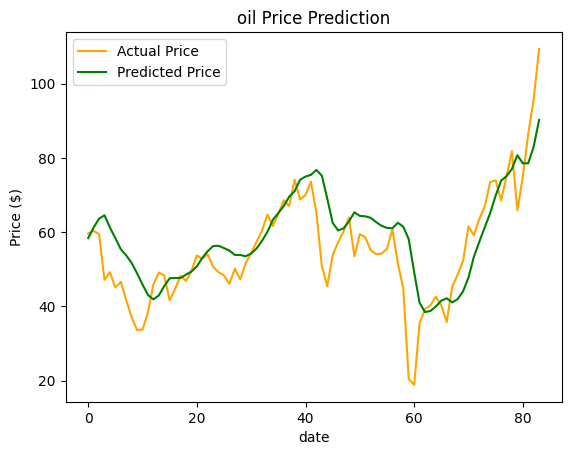

In [87]:
y_pred = model.predict(X_test)

# invert the scaler to get the absolute price data
y_test_orig = scaler.inverse_transform(y_test)
y_pred_orig = scaler.inverse_transform(y_pred)

# plots of prediction against actual data
plt.plot(y_test_orig, label='Actual Price', color='orange')
plt.plot(y_pred_orig, label='Predicted Price', color='green')
 
plt.title('oil Price Prediction')
plt.xlabel('date')
plt.ylabel('Price ($)')
plt.legend(loc='best')

plt.show();

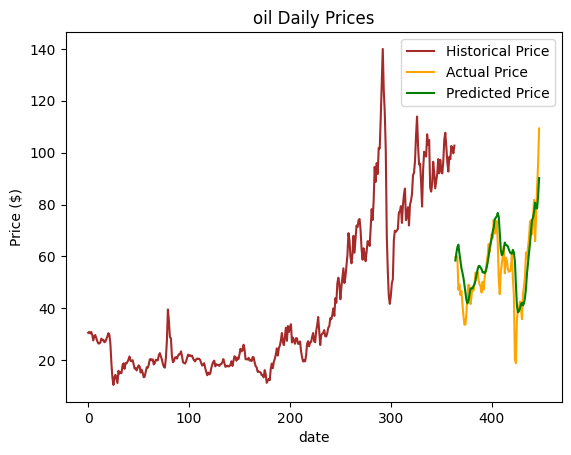

In [88]:
# plot for whole range of data
plt.plot(np.arange(0, len(y_train)), scaler.inverse_transform(y_train), color='brown', label='Historical Price')
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test_orig)), y_test_orig, color='orange', label='Actual Price')
plt.plot(np.arange(len(y_train), len(y_train) + len(y_pred_orig)), y_pred_orig, color='green', label='Predicted Price')

plt.title('oil Daily Prices')
plt.xlabel('date')
plt.ylabel('Price ($)')
plt.legend()
plt.show();